In [17]:
! pip install pandas

In [18]:
! pip install scikit-learn

In [31]:
! pip install matplotlib

  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-10.4.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl (218 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.2 MB 4.2 MB/s eta 0:00:01
   ---------------------------- ----------- 1.6/2.2 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 4.4 MB/s eta 0:00:00
Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl (55 kB)
Using cached pillow-10.4.0-c

In [32]:
! pip install seaborn

In [19]:
import pandas as pd
from sklearn.svm import LinearSVC 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [20]:
file_path = 'datasets/tracking.csv'
data = pd.read_csv(file_path)

data.head()

,inicial,palestras,contato,comprou,patrocinio
0,1,1,0,0,0
1,1,1,0,0,0
2,1,1,0,0,0
3,1,1,0,0,0
4,1,1,0,0,0


In [21]:
X = data.drop('comprou', axis=1)
y = data['comprou']

In [22]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
model = DecisionTreeClassifier()

model.fit(X_treino, y_treino)

DecisionTreeClassifier()

In [49]:
y_previsao = model.predict(X_teste)

print(y_previsao)

[0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0]


In [25]:
taxa_de_acerto = accuracy_score(y_teste, y_previsao)
print(f'Acurácia do modelo: {taxa_de_acerto:.2f}')

Acurácia do modelo: 0.95


In [29]:
X = data.drop('comprou', axis=1)
y = data['comprou']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()

model.fit(X_treino, y_treino)

y_pred = model.predict(X_teste)

accuracy = accuracy_score(y_teste, y_previsao)
print(f'Acurácia do modelo: {accuracy:.2f}')

Acurácia do modelo: 0.95


In [51]:

X = data.drop('comprou', axis=1)
y = data['comprou']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearSVC()

model.fit(X_treino, y_treino)

y_previsao = model.predict(X_teste)

taxa_de_acerto = accuracy_score(y_teste, y_previsao)
print(f'Acurácia do modelo: {taxa_de_acerto:.2f}')

Acurácia do modelo: 0.95


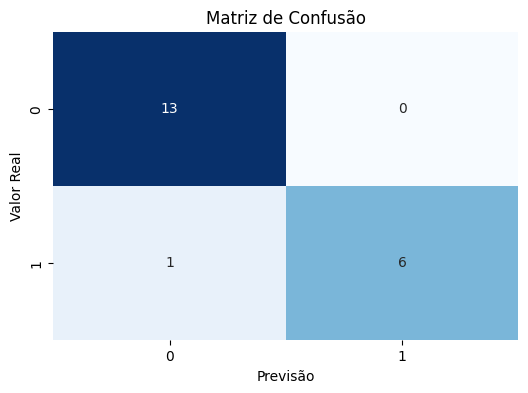

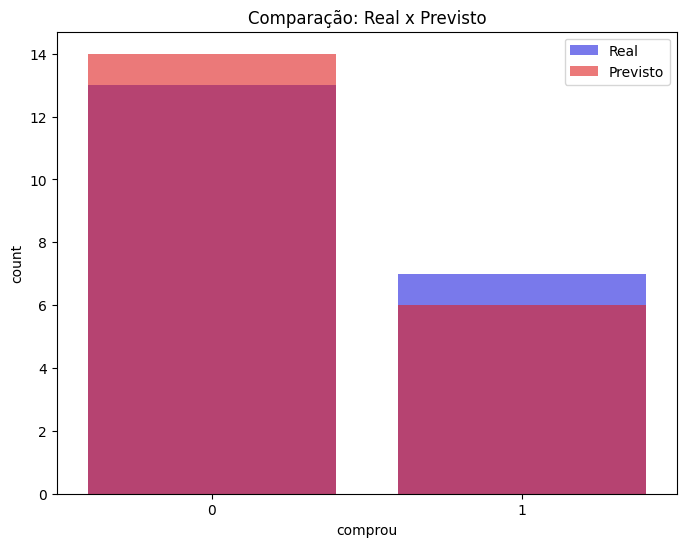

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_teste)

# 1. Criar a matriz de confusão
conf_matrix = confusion_matrix(y_teste, y_previsao)

# 2. Plotar a matriz de confusão usando seaborn
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.show()

# 3. Gráfico comparando previsões e valores reais
plt.figure(figsize=(8,6))
sns.countplot(x=y_teste, label="Real", alpha=0.6, color='blue')
sns.countplot(x=y_previsao, label="Previsto", alpha=0.6, color='red')
plt.title('Comparação: Real x Previsto')
plt.legend()
plt.show()


Perfil dos compradores:
         inicial  palestras    contato  comprou  patrocinio
count  33.000000  33.000000  33.000000     33.0   33.000000
mean    0.969697   0.181818   0.939394      1.0    0.030303
std     0.174078   0.391675   0.242306      0.0    0.174078
min     0.000000   0.000000   0.000000      1.0    0.000000
25%     1.000000   0.000000   1.000000      1.0    0.000000
50%     1.000000   0.000000   1.000000      1.0    0.000000
75%     1.000000   0.000000   1.000000      1.0    0.000000
max     1.000000   1.000000   1.000000      1.0    1.000000


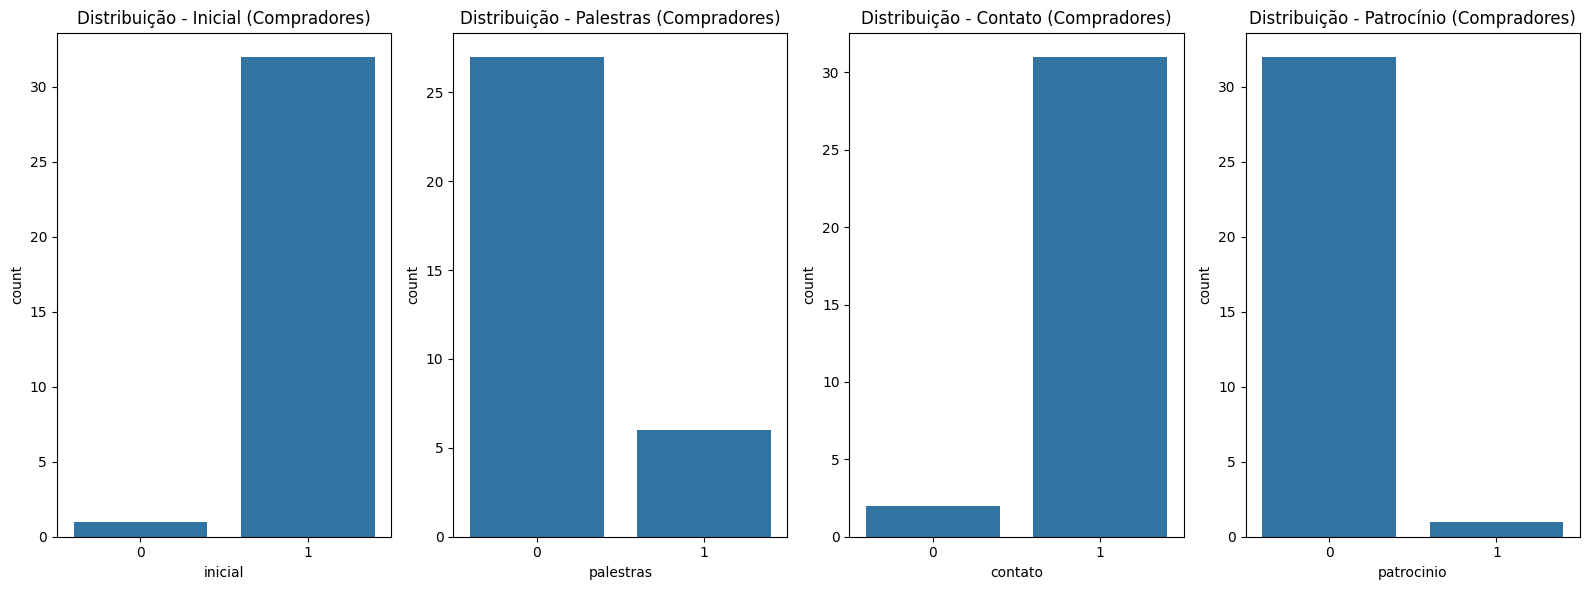

In [53]:
# Filtrar apenas quem comprou
compradores = data[data['comprou'] == 1]

# 1. Ver a distribuição das variáveis para quem comprou
perfil_compradores = compradores.describe()

print("Perfil dos compradores:")
print(perfil_compradores)

# 2. Visualizar com gráficos de barras a distribuição das variáveis para quem comprou
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 6))

# Gráfico para a variável 'inicial'
plt.subplot(1, 4, 1)
sns.countplot(x='inicial', data=compradores)
plt.title('Distribuição - Inicial (Compradores)')

# Gráfico para a variável 'palestras'
plt.subplot(1, 4, 2)
sns.countplot(x='palestras', data=compradores)
plt.title('Distribuição - Palestras (Compradores)')

# Gráfico para a variável 'contato'
plt.subplot(1, 4, 3)
sns.countplot(x='contato', data=compradores)
plt.title('Distribuição - Contato (Compradores)')

# Gráfico para a variável 'patrocinio'
plt.subplot(1, 4, 4)
sns.countplot(x='patrocinio', data=compradores)
plt.title('Distribuição - Patrocínio (Compradores)')

plt.tight_layout()
plt.show()


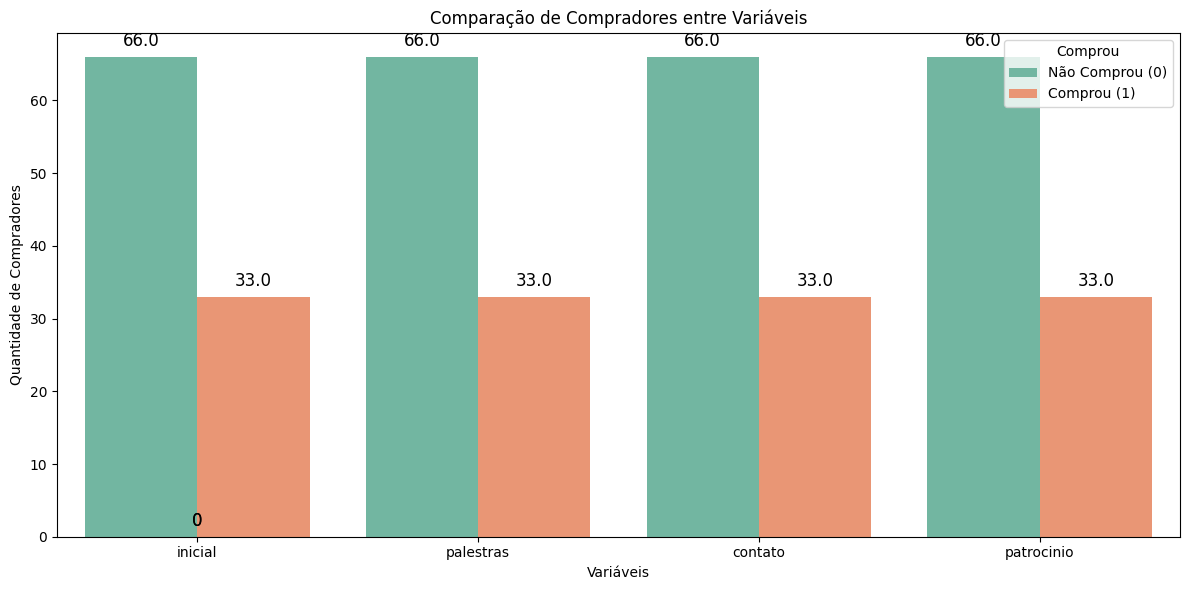

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Supondo que 'df' é o DataFrame que você já possui
# Adicionar uma coluna 'comprou' ao DataFrame com os valores correspondentes para cada variável
data_long = data.melt(id_vars='comprou', value_vars=['inicial', 'palestras', 'contato', 'patrocinio'],
                    var_name='variavel', value_name='valor')

# Criar o gráfico de barras empilhadas
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=data_long, x='variavel', hue='comprou', palette='Set2')

# Adicionar as quantidades dentro das barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', 
                fontsize=12, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

# Configurar o gráfico
plt.title('Comparação de Compradores entre Variáveis')
plt.xlabel('Variáveis')
plt.ylabel('Quantidade de Compradores')
plt.legend(title='Comprou', labels=['Não Comprou (0)', 'Comprou (1)'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
